<a href="https://colab.research.google.com/github/jypara/NBD_assigns/blob/master/Lab6_dz_DFT_FFT_STFT_ens20086.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Modifying the signal in the frequency domain 

Let's take a signal containing to frequency components: $1kHz$ and $2kHz$. We want to remove one of those frequencies from the signal, but we don't know anything about filtering yet - there is an easy way to deal with this using the Fast Fourier Transform and its inverse. 

1. Generate the above signal and draw its plot.
2. Compute the Fourier Transform and draw the amplitude spectrum of the signal.
3. Delete the values of the chosen frequency component with a small margin around it, eg between $900-1100 Hz$ to erase the $1kHz$ signal.
4. Take into account that the Fourier transform has to be symmetrical so apply the correction procedure described below. 
5. Plot the corrected spectrum one more time. 
6. Compute the inverse Fourier Transform and plot the resulting signal. Check that the signal is real (ie. the imaginary part of all its samples has to be very close to 0). 

## Hermitian symmetry

\begin{equation}
H_{F_{s}-x}=H_x^\star \text{, for } x \in <1,F_s-1>
\end{equation}

We can implement it by performing the following steps:

1. Copy the left side of the graph (without the 0 and $F_s/2$)
2. Use `np.flipud` to invert the graph.
3. Use `np.conj` to get the complex conjugate.
4. Paste the result to the right side of the graph (also without $F_s/2$).

(1519.8898013231712-4677.739819856343j)
4918.466715393715


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


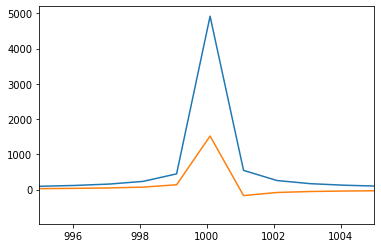

In [ ]:
Fs=10000
T=1
t=linspace(0,T,T*Fs)
y=sin(2000*2*pi*t)+sin(1000*2*pi*t)
Y=fft.fft(y)
f=linspace(0,Fs,Y.size)
plot(f,abs(Y))
plot(f,Y)
xlim(995,1005)
print(Y[1000])
print(abs(Y[1000]))

/usr/local/lib/python3.6/dist-packages/numpy/fft/_pocketfft.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


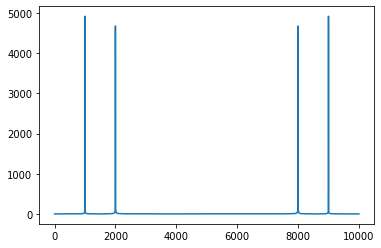

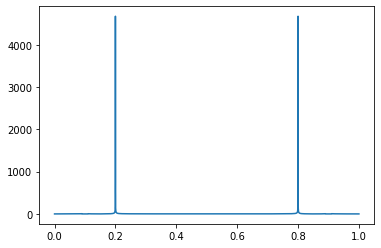

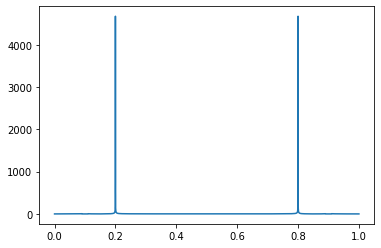

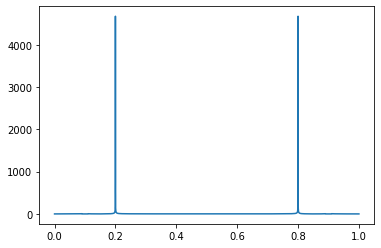

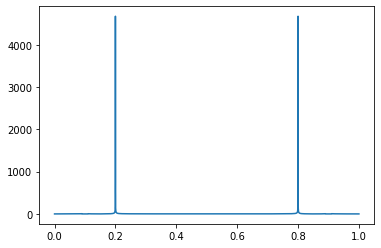

In [ ]:
Fs=10000
T=1
t=linspace(0,T,T*Fs)
y=sin(2000*2*pi*t)+sin(1000*2*pi*t)
Y=fft.fft(y)
f=linspace(0,Fs,Y.size)
plot(f,abs(Y))
Y[900:1100]=0
figure()
Y[int(Y.size/2)+1:]=conj(flipud(Y[1:int(Y.size/2)]))
plot(t,abs(Y))

y=fft.ifft(Y)
figure()
plot(t,abs(Y))


y=fft.rfft(Y)
figure()
plot(t,abs(Y))


y=fft.irfft(Y)
figure()
plot(t,abs(Y))

## Alternative solution

Instead of `fft.fft` and `fft.ifft` we can use slightly more efficient implementations `fft.rfft` and `fft.irfft`. R-FFT computes only half of the graph (between $0..F_s/2$) and I-R-FFT computes the inverse of R-FFT ignoring the symmetry requirements altogether (assuming that the signal is real - therefore the name).

Repeat the previous experiment but using the `fft.rfft` and `fft.irfft`.

0.0


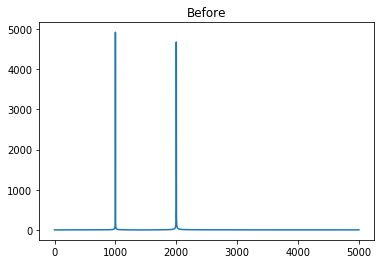

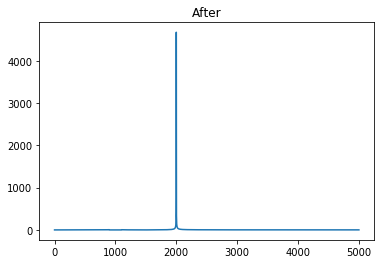

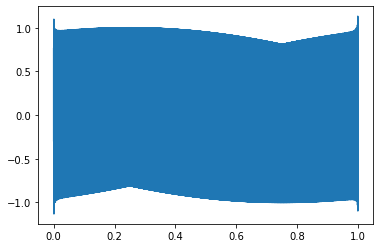

In [ ]:
Fs=10000
T=1

t=linspace(0,T,T*Fs)

y=sin(2000*2*pi*t)+sin(1000*2*pi*t)

Y=fft.rfft(y)

f=linspace(0,Fs/2,Y.size)
plot(f,abs(Y))
title('Before')

Y[900:1100]=0

figure()
plot(f,abs(Y))
title('After')

y=fft.irfft(Y)

print(max(y.imag))

figure()
plot(t,y)

# Frequency leakage

1. Generate a sequence of ~100 numbers spread lineary between 999 and 1001.
2. Create a loop to generate a signal with a frequency from pt. 1, unit amplitude and zero phase.  
3. In each iteration, compute the Fourier transform of the signal and compute the height of the peak amplitude (using `np.max`) and store it in a list.   
4. Draw the list of stored values from pt. 3 using a plot whose labels on the X axis are values from pt 1. 

Note that, depending on the frequency, the height of the amplitude peak is not constant and changes, even by 40%! Lets look at the extreme values (minimum and maximum) in the spectral domain. 

Note that for the maximum, the plot is almost ideal: one point exactly at the chosen frequency and its value is the same as the amplitude of the signal multiplied by half of the length of the signal (the other half is on the right side of the plot).

The minimal point is completely different. Since the analyzed frequency isn't located precisely at any point of the DFT, the amplitude "leaks" to the neighboring points - lowering the height of the peak, but preserving the Parseval theorem.  

1000.89898989899
999.4040404040404


Text(0.5, 1.0, 'Worst')

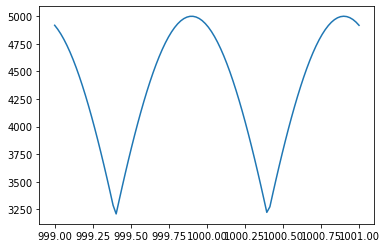

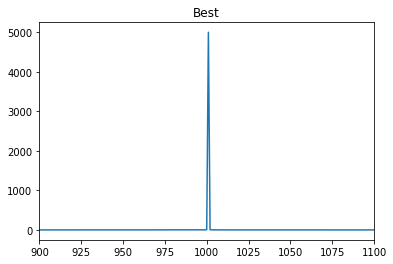

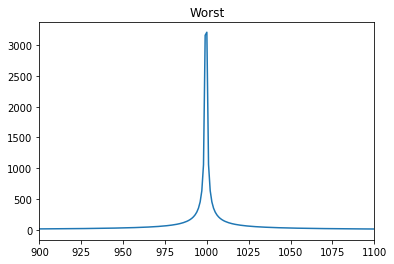

In [ ]:
Fs=10000
T=1
t=linspace(0,T,T*Fs)
fs=linspace(999,1001,100)
a=[]
for f in fs:
  y=sin(2*pi*f*t)
  Y=fft.fft(y)
  a.append(max(abs(Y)))

plot(fs,a)
fbest=fs[argmax(a)]
fworst=fs[argmin(a)]
print(fbest)
print(fworst)
figure()
y=sin(2*pi*fbest*t)
Y=fft.fft(y)
plot(abs(Y))
xlim(900,1100)
title('Best')

figure()
y=sin(2*pi*fworst*t)
Y=fft.fft(y)
plot(abs(Y))
xlim(900,1100)
title('Worst')

# Windowing

Plot the Hamming function and its amplitude spectrum. Generate 10ms of a 1 kHz signal. Draw its amplitude sepctrum and note the leakage. Multiply the signal with the Hamming function (of the same length) and plot the amplitude spectrum again.

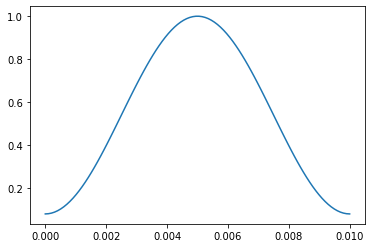

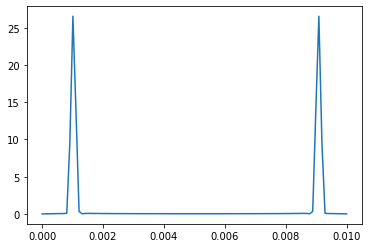

In [ ]:
Fs=10000
T=0.01
t=linspace(0,T,T*Fs)

y=sin(2*pi*t*1000)
win=hamming(y.size)
plot(t,win)
y=y*win
Y=fft.fft(y)
figure()
plot(t,abs(Y))

# STFT

Implement your own STFT. First generate a sample signal: 5 seconds sampled at 16 kHz containing a component at a constant frequency of 1000 Hz and another one with the frequency increasing with time from 0 to $2 \cdot F_s$.

In [ ]:
T=5
Fs=16000
t=linspace(0,T,T*Fs)
y1=sin(2*pi*t*1000)
y2=sin(2*pi*t*linspace(0,2*Fs,t.size))
y=y1+y2


Start by splitting the signal into short-term windows aka. frames.

Defined by the following variables:

  * $L$ - length of the signal (in samples)
  * $T$ - duration of the signal (in seconds) 
  * $win\_len$ - window length (in samples) - eg. 256
  * $win\_shift$ - window shift (in samples) - eg. 128
  * $win\_num$ - number of windows per signal (rounded down) - $\frac{L-win\_len}{win\_shift}+1$
  * $S$ - 2D matrix of shape ($\frac{win\_len}{2}+1$,$win\_num$)
  
For each iteration of a loop extract a window from the signal and compute its Fourier Transform. Save the result in the $S$ matrix.

Compute the labels for the X and Y axes of the plot and use the `pyplot.pcolormesh` function to draw the magnitude $S$ matrix. You can also compute the logarithm of the magnitude to increase the details of the plot.

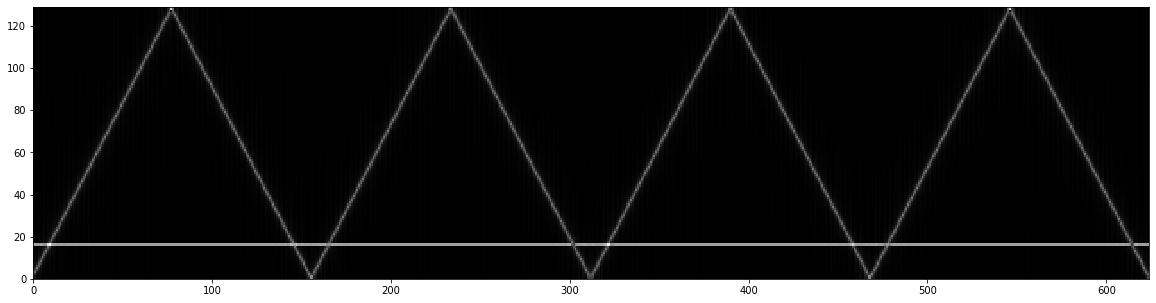

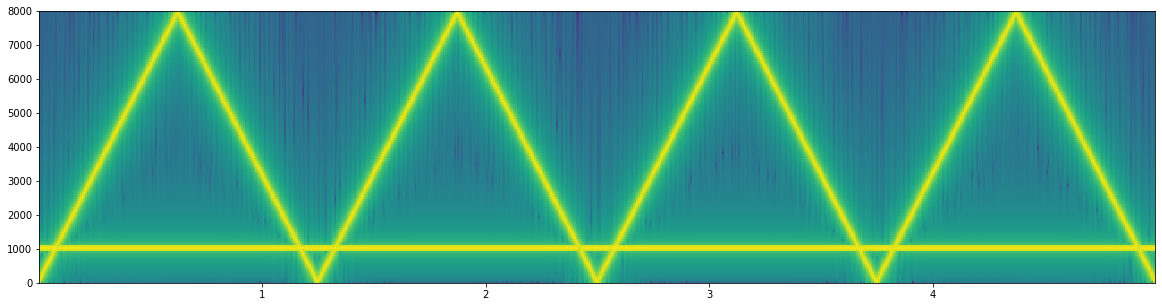

In [ ]:
L=y.size
winLen=256
winShift=128
winNum=int(floor((L-winLen)/winShift))+1
S=zeros((int(winLen/2)+1,winNum))
figure(figsize=(20,5))  
for i in range(winNum):
  begin=i*winShift
  end=begin+winLen
  win=y[begin:end]
  Y=fft.rfft(win)
  S[:,i]=abs(Y)
pcolormesh(S,cmap=cm.gray)
figure(figsize=(20,5))  
_=specgram(y,Fs=Fs)


The image is still quite noisy. Use a windowing function (like the Hamming function) to clean it up.

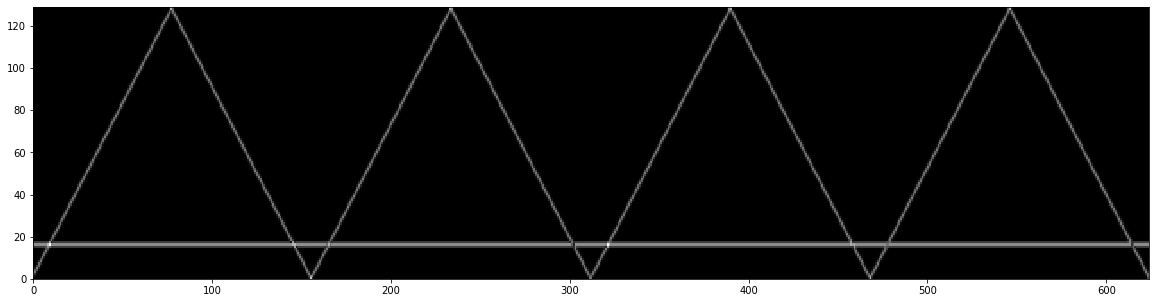

In [ ]:
L=y.size
winLen=256
winShift=int(winLen/2)
winNum=int(floor((L-winLen)/winShift))+1
S=zeros((int(winLen/2)+1,winNum))
figure(figsize=(20,5))  
for i in range(winNum):
  begin=i*winShift
  end=begin+winLen
  win=y[begin:end]*hamming(winLen)
  Y=fft.rfft(win)
  S[:,i]=abs(Y)
pcolormesh(S,cmap=cm.gray)


What happens if we change the window length?

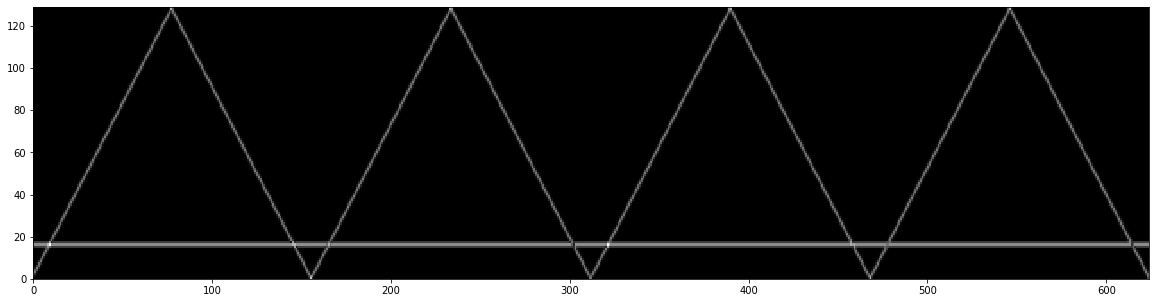

In [ ]:
L=y.size
winLen=256
winShift=int(winLen/2)
winNum=int(floor((L-winLen)/winShift))+1
S=zeros((int(winLen/2)+1,winNum))
figure(figsize=(20,5))  
for i in range(winNum):
  begin=i*winShift
  end=begin+winLen
  win=y[begin:end]*hamming(winLen)
  Y=fft.rfft(win)
  S[:,i]=abs(Y)
pcolormesh(S,cmap=cm.gray)



What happens if we add a DC-offset to the signal?

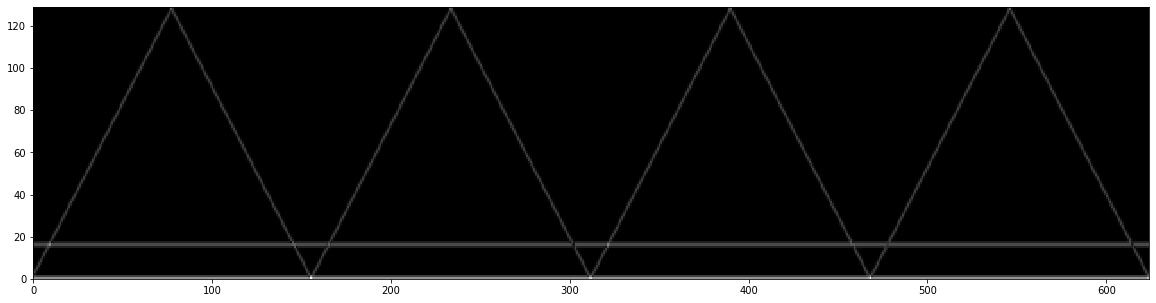

In [ ]:
L=y.size
win_len=256
win_shift=int(win_len/2)

win_num=int(floor((L-win_len)/win_shift))+1
S=zeros((int(win_len/2)+1,win_num))
for i in range(win_num):
  beg=i*win_shift
  end=beg+win_len
  win=(y[beg:end]+1)*hamming(win_len)

  Y=fft.rfft(win)
  S[:,i]=abs(Y)

figure(figsize=(20,5))
pcolormesh(S,cmap=cm.gray)

The image has a low resolution. Add another parameter called $fftn$ (eg. 512, generally a power of 2) and compute the Fourier Transform with the window padded with zeros to that amount. 

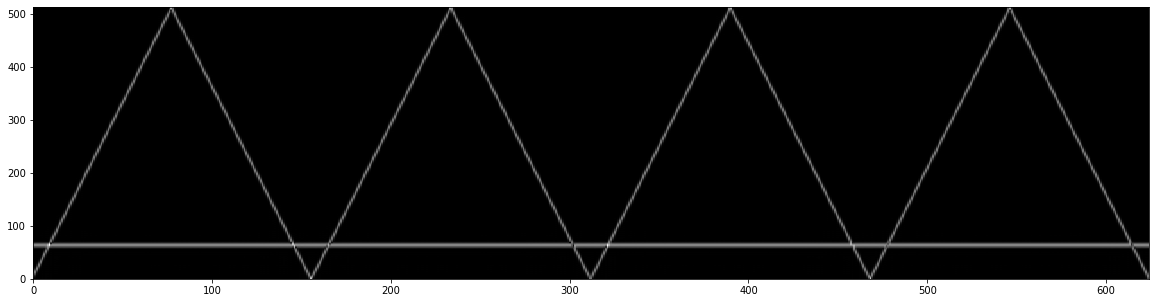

In [ ]:
L=y.size
nfft=1024
winLen=256
winShift=int(winLen/2)
winNum=int(floor((L-winLen)/winShift))+1
S=zeros((int(nfft/2)+1,winNum))
figure(figsize=(20,5))  
for i in range(winNum):
  begin=i*winShift
  end=begin+winLen
  win=y[begin:end]*hamming(winLen)
  win2=zeros(nfft)
  win2[:winLen]=win
  Y=fft.rfft(win2)
  S[:,i]=abs(Y)
pcolormesh(S,cmap=cm.gray)


Compare your implementation to the built-in `pyplot.specgram` function. Read the documentation and note what each parameter does.

(array([[6.20926869e-04, 3.04825785e-08, 1.21118137e-07, ...,
         1.39127934e-07, 5.24869541e-10, 6.49946629e-04],
        [1.40859342e-03, 1.57967510e-06, 3.71481526e-07, ...,
         4.32117244e-07, 1.49828202e-06, 1.47111496e-03],
        [1.89597457e-03, 7.81049756e-06, 5.76454939e-07, ...,
         6.65651152e-07, 7.99985345e-06, 1.96720432e-03],
        ...,
        [3.80438253e-18, 1.89812701e-18, 9.04363002e-18, ...,
         2.76746626e-18, 4.80386664e-20, 4.01890593e-19],
        [1.34014716e-16, 1.21395645e-16, 8.57520434e-17, ...,
         2.48275906e-16, 1.89675414e-16, 1.73538326e-16],
        [1.28621183e-16, 1.15962658e-16, 8.04371681e-17, ...,
         2.42068541e-16, 1.90922591e-16, 1.72771969e-16]]),
 array([   0.   ,   15.625,   31.25 ,   46.875,   62.5  ,   78.125,
          93.75 ,  109.375,  125.   ,  140.625,  156.25 ,  171.875,
         187.5  ,  203.125,  218.75 ,  234.375,  250.   ,  265.625,
         281.25 ,  296.875,  312.5  ,  328.125,  343.75 ,  35

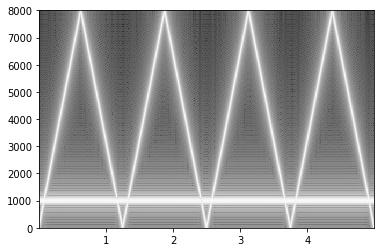

In [ ]:
specgram(y,NFFT=win_len,Fs=Fs,noverlap=win_len-win_shift,pad_to=nfft,cmap=cm.gray)

# Homework

## 1. Filtering in the frequency domain

Use filtering in the frequency domain to recreate the low ($<200Hz$), middle (between $500Hz$ and $1000Hz$) and high (between $2 kHz$ and $4 kHz$) frequencies of a natural speech signal.

In [ ]:
!wget https://danijel3.github.io/PSO_lecture/%C4%87wiczenia/zdanie.wav
from IPython.display import Audio
from scipy.io.wavfile import read


--2019-12-01 22:31:41--  https://danijel3.github.io/PSO_lecture/%C4%87wiczenia/zdanie.wav
Resolving danijel3.github.io (danijel3.github.io)... 185.199.110.153, 185.199.111.153, 185.199.109.153, ...
Connecting to danijel3.github.io (danijel3.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 540980 (528K) [audio/wav]
Saving to: ‘zdanie.wav.4’

zdanie.wav.4        100%[===================>] 528.30K  --.-KB/s    in 0.04s   

2019-12-01 22:31:42 (13.4 MB/s) - ‘zdanie.wav.4’ saved [540980/540980]



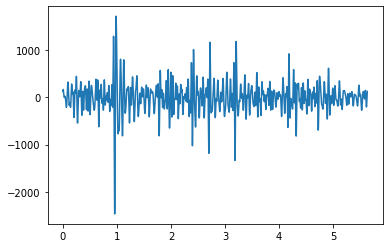

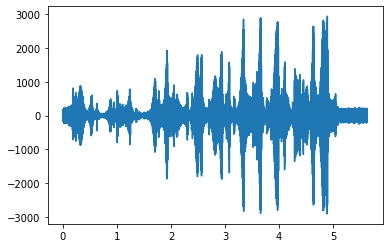

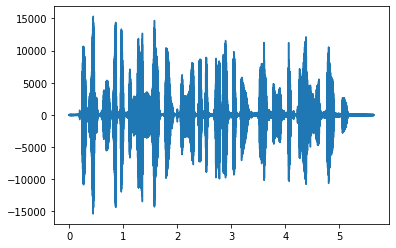

In [ ]:
T=y.size/Fs
t=linspace(0,T,T*Fs)
Fs,y=read('zdanie.wav')

Y=fft.rfft(y)
Y1=Y.copy()
Y1[200:]=0
y1=fft.irfft(Y1)
plot(t,y1)

figure()
Y2=Y.copy()
Y2[:500]=0
Y2[1000:]=0
y2=fft.irfft(Y2)
plot(t,y2)

figure()
Y3=Y.copy()
Y3[:2000]=0
Y3[4000:]=0
y3=fft.irfft(Y3)
plot(t,y3)

Audio(y3,rate=Fs)

## 2. Windowing functions

Draw and test the following windowing function present in the numpy library:

* bartlett
* blackman
* hamming
* hanning
* kaiser

Also test the different $\beta$ parameters for the `kaiser` function.

Note specifically the amplitude spectrum in the log scale of each windowing function.

Populating the interactive namespace from numpy and matplotlib


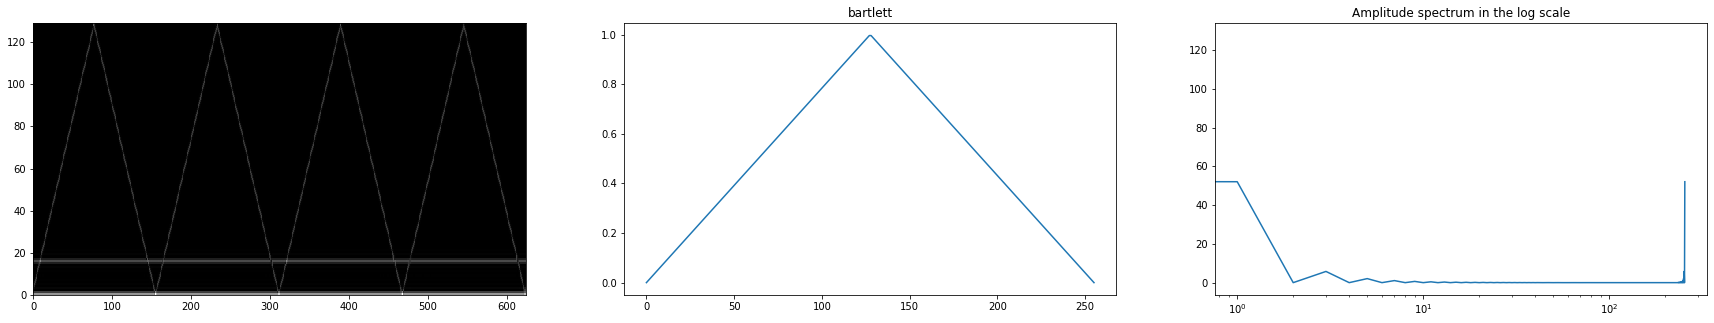

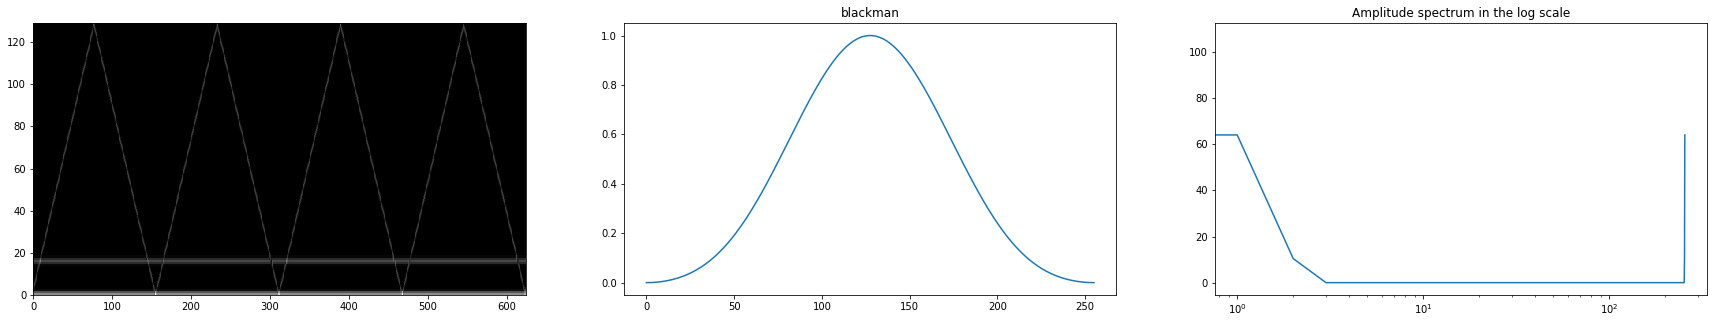

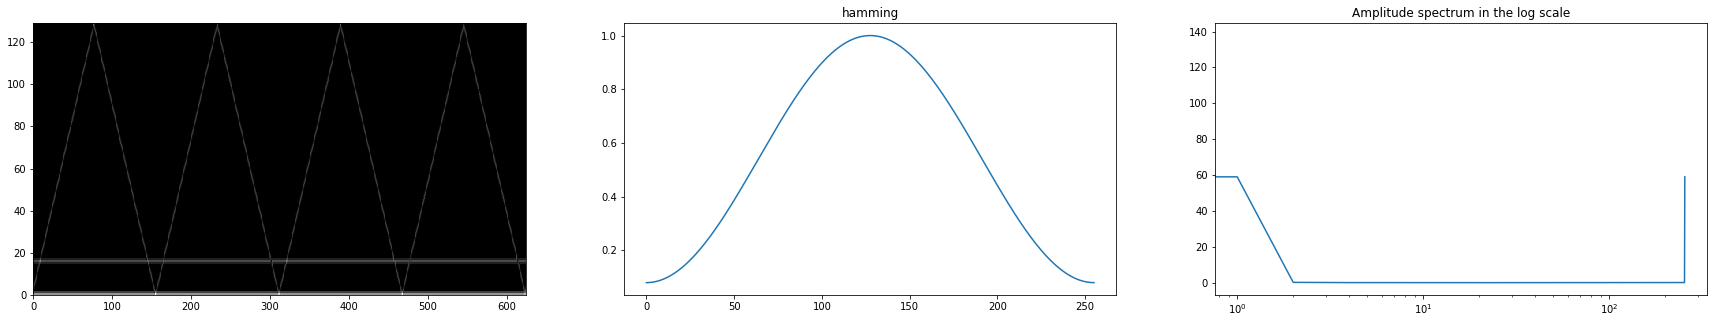

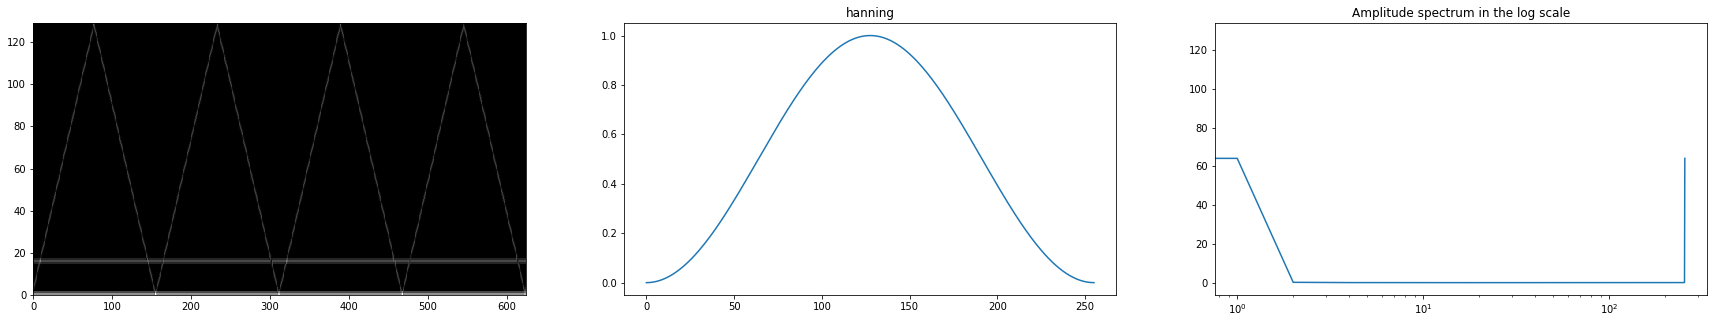

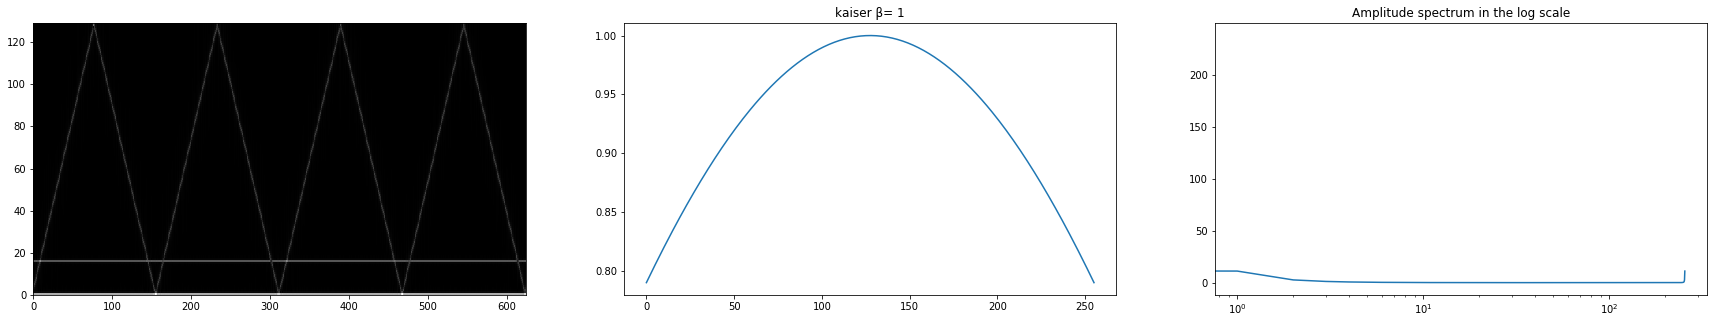

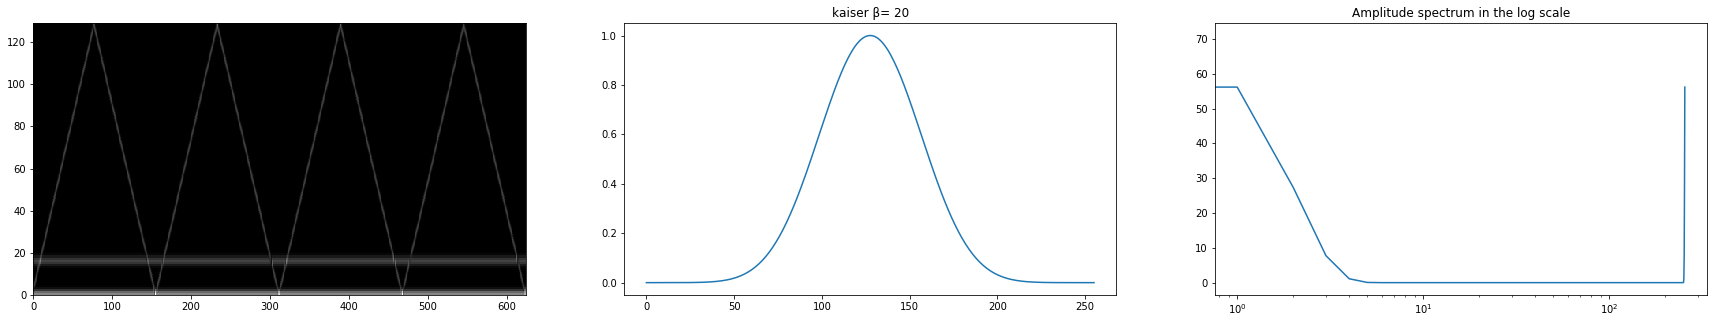

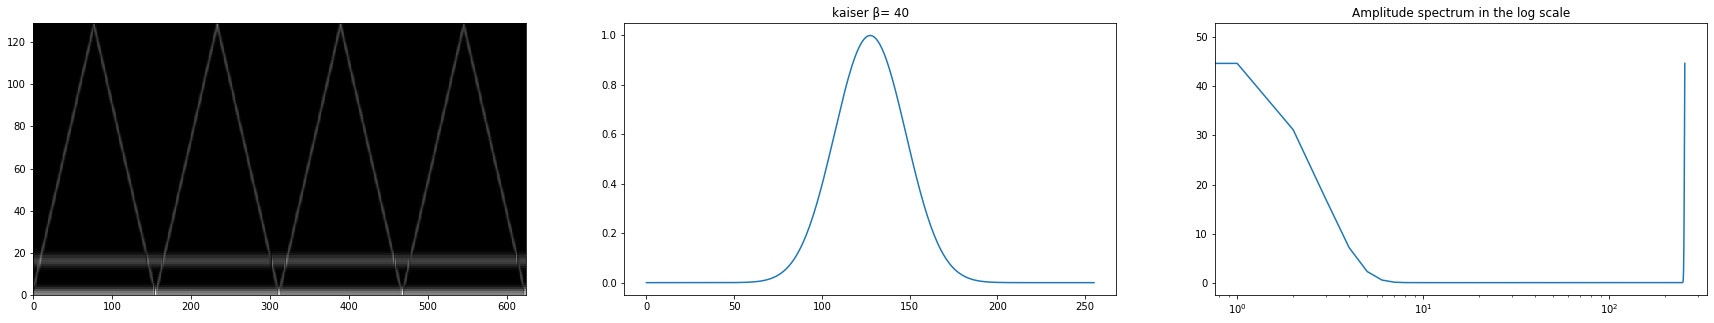

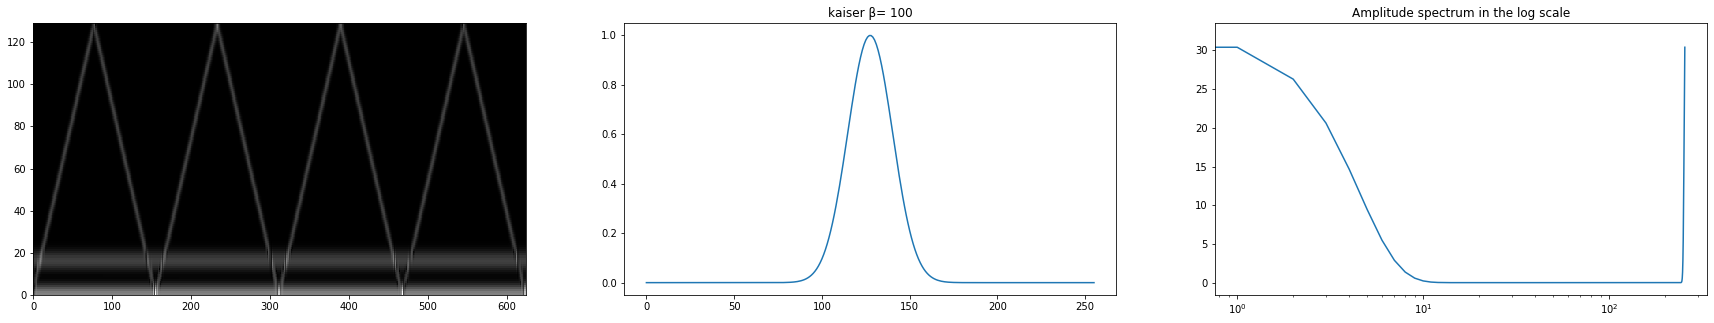

In [ ]:
%pylab inline

def task2(t,y,f,β=0):
  L=y.size
  win_len=2**8 
  win_shift=int(win_len/2)

  win_num=int(floor((L-win_len)/win_shift))+1
  S=zeros((int(win_len/2)+1,win_num))
  for i in range(win_num):
    beg=i*win_shift
    end=beg+win_len
    win=(y[beg:end]+1)*( f(win_len) if(β==0) else f(win_len,β))
    Y=fft.rfft(win)
    S[:,i]=abs(Y)
  figure(figsize=(30,5))
  subplot(1,3,1)
  pcolormesh(S,cmap=cm.gray)
 
  subplot(1,3,2)
  plot(f(win_len) if(β==0) else f(win_len,β))
  if(β==0):
    title(f.__name__)
  else:
    title(f.__name__+" β= "+str(β))  
  subplot(1,3,3)
  title('Amplitude spectrum in the log scale')
  xscale('log')
  plot(abs(fft.fft(f(win_len)) if(β==0) else abs(fft.fft(f(win_len,β)))))

  
T=5
Fs=16000
t=linspace(0,T,T*Fs)
y1=sin(2*pi*t*1000)
y2=sin(2*pi*t*linspace(0,2*Fs,t.size))
y=y1+y2

task2(t,y,bartlett)
task2(t,y,blackman)
task2(t,y,hamming)
task2(t,y,hanning)
task2(t,y,kaiser,1)
task2(t,y,kaiser,20)
task2(t,y,kaiser,40)
task2(t,y,kaiser,100)
